In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import convolve2d


In [22]:
image_path = "cat.11.jpg"  # Ensure the image exists in your directory
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [6]:
if image is None:
    raise ValueError("Error: Image not found. Check the file path.")

In [8]:
# Define an edge detection filter
filter = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])


In [10]:
# Apply convolution
feature_map = convolve2d(image, filter, mode='valid') 

In [12]:
relu_feature_map = tf.nn.relu(feature_map).numpy()

In [14]:
relu_feature_map = np.expand_dims(relu_feature_map, axis=(0, -1))  # Reshape for TensorFlow pooling
pooled_feature_map = tf.nn.max_pool2d(relu_feature_map, ksize=2, strides=2, padding='VALID')

In [16]:
# Convert back to numpy for visualization
pooled_feature_map = pooled_feature_map.numpy().squeeze()

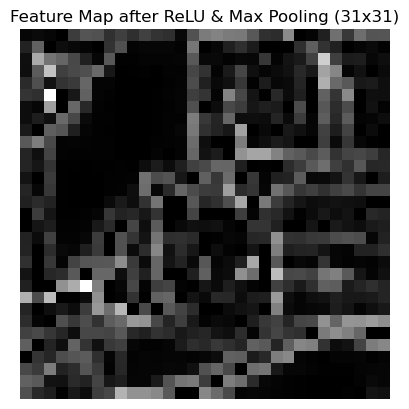

In [18]:
# Step 4: Visualize the final feature map (Expected size: 31x31)
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Feature Map after ReLU & Max Pooling (31x31)")
plt.axis('off')
plt.show()

In [20]:

# Step 5: Confirm size reduction
print(f"Original Feature Map Size: {feature_map.shape}")
print(f"Reduced Feature Map Size: {pooled_feature_map.shape}")

Original Feature Map Size: (62, 62)
Reduced Feature Map Size: (31, 31)
